In [54]:
import pandas as pd

january_june_tweets_subset = pd.read_csv('D:/TwitterData/covid_mask_geoloc_tweets_subset_14d_sentiment_emotion_metrics.csv', encoding='utf-8')

#### Rescaling sentiment binary categories to 0 or 100 (to make it compatible with a % value between 0 and 100 on the y-axis)

In [55]:
january_june_tweets_subset['compound_text_neu_binary'] = 100 * january_june_tweets_subset['compound_text_neu_binary']
january_june_tweets_subset['compound_text_tokens_neu_binary'] = 100 * january_june_tweets_subset['compound_text_tokens_neu_binary']

In [56]:
january_june_tweets_subset['compound_text_pos_binary'] = 100 * january_june_tweets_subset['compound_text_pos_binary']
january_june_tweets_subset['compound_text_tokens_pos_binary'] = 100 * january_june_tweets_subset['compound_text_tokens_pos_binary']

In [57]:
january_june_tweets_subset['compound_text_neg_binary'] = 100 * january_june_tweets_subset['compound_text_neg_binary']
january_june_tweets_subset['compound_text_tokens_neg_binary'] = 100 * january_june_tweets_subset['compound_text_tokens_neg_binary']

#### Rescaling emotion averages

#### The first x100 is due to the fact that emotion values were on a scale from 0 to 1. 
#### The second x100 is to make these features compatible with a % value between 0 and 100 on the y-axis.

In [58]:
january_june_tweets_subset['anger_text_avg'] = 100 * 100 * january_june_tweets_subset['anger_text_avg']
january_june_tweets_subset['anger_text_tokens_avg'] = 100 * 100 * january_june_tweets_subset['anger_text_tokens_avg']

In [59]:
january_june_tweets_subset['anticipation_text_avg'] = 100 * 100 * january_june_tweets_subset['anticipation_text_avg']
january_june_tweets_subset['anticipation_text_tokens_avg'] = 100 * 100 * january_june_tweets_subset['anticipation_text_tokens_avg']

In [60]:
january_june_tweets_subset['disgust_text_avg'] = 100 * 100 * january_june_tweets_subset['disgust_text_avg']
january_june_tweets_subset['disgust_text_tokens_avg'] = 100 * 100 * january_june_tweets_subset['disgust_text_tokens_avg']

In [61]:
january_june_tweets_subset['fear_text_avg'] = 100 * 100 * january_june_tweets_subset['fear_text_avg']
january_june_tweets_subset['fear_text_tokens_avg'] = 100 * 100 * january_june_tweets_subset['fear_text_tokens_avg']

In [62]:
january_june_tweets_subset['joy_text_avg'] = 100 * 100 * january_june_tweets_subset['joy_text_avg']
january_june_tweets_subset['joy_text_tokens_avg'] = 100 * 100 * january_june_tweets_subset['joy_text_tokens_avg']

In [63]:
january_june_tweets_subset['sadness_text_avg'] = 100 * 100 * january_june_tweets_subset['sadness_text_avg']
january_june_tweets_subset['sadness_text_tokens_avg'] = 100 * 100 * january_june_tweets_subset['sadness_text_tokens_avg']

In [64]:
january_june_tweets_subset['surprise_text_avg'] = 100 * 100 * january_june_tweets_subset['surprise_text_avg']
january_june_tweets_subset['surprise_text_tokens_avg'] = 100 * 100 * january_june_tweets_subset['surprise_text_tokens_avg']

In [65]:
january_june_tweets_subset['trust_text_avg'] = 100 * 100 * january_june_tweets_subset['trust_text_avg']
january_june_tweets_subset['trust_text_tokens_avg'] = 100 * 100 * january_june_tweets_subset['trust_text_tokens_avg']

In [66]:
def valence(sent_value):
    if abs(sent_value) < 0.05 or abs(sent_value) == 0.05:
        return("neutral")
    elif sent_value < -0.05:
        return("negative")
    else:
        return("positive")

In [67]:
january_june_tweets_subset['raw_tweet_sentiment'] = january_june_tweets_subset['compound_text'].apply(lambda x: valence(x))
january_june_tweets_subset['preprocessed_tweet_sentiment'] = january_june_tweets_subset['compound_text_tokens'].apply(lambda x: valence(x))

#### Plots

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [69]:
january_june_tweets_subset_neu = january_june_tweets_subset.groupby('date')['compound_text_neu_binary'].mean().reset_index()
january_june_tweets_subset_neg = january_june_tweets_subset.groupby('date')['compound_text_neg_binary'].mean().reset_index()
january_june_tweets_subset_pos = january_june_tweets_subset.groupby('date')['compound_text_pos_binary'].mean().reset_index()

In [70]:
january_june_tweets_subset_tokens_neu = january_june_tweets_subset.groupby('date')['compound_text_tokens_neu_binary'].mean().reset_index()
january_june_tweets_subset_tokens_neg = january_june_tweets_subset.groupby('date')['compound_text_tokens_neg_binary'].mean().reset_index()
january_june_tweets_subset_tokens_pos = january_june_tweets_subset.groupby('date')['compound_text_tokens_pos_binary'].mean().reset_index()

In [71]:
january_june_tweets_subset_neu_df = pd.DataFrame(january_june_tweets_subset_neu)
january_june_tweets_subset_neu_df.columns = ['date','compound_text_neu_binary']

january_june_tweets_subset_neg_df = pd.DataFrame(january_june_tweets_subset_neg)
january_june_tweets_subset_neg_df.columns = ['date','compound_text_neg_binary']

january_june_tweets_subset_pos_df = pd.DataFrame(january_june_tweets_subset_pos)
january_june_tweets_subset_pos_df.columns = ['date','compound_text_pos_binary']

In [72]:
january_june_tweets_subset_tokens_neu_df = pd.DataFrame(january_june_tweets_subset_tokens_neu)
january_june_tweets_subset_tokens_neu_df.columns = ['date','compound_text_tokens_neu_binary']

january_june_tweets_subset_tokens_neg_df = pd.DataFrame(january_june_tweets_subset_tokens_neg)
january_june_tweets_subset_tokens_neg_df.columns = ['date','compound_text_tokens_neg_binary']

january_june_tweets_subset_tokens_pos_df = pd.DataFrame(january_june_tweets_subset_tokens_pos)
january_june_tweets_subset_tokens_pos_df.columns = ['date','compound_text_tokens_pos_binary']

In [73]:
january_june_tweets_subset_neu_df

,date,compound_text_neu_binary
0,2020-03-20,16.518255
1,2020-03-21,12.093659
2,2020-03-22,14.816375
3,2020-03-23,15.251113
4,2020-03-24,12.060838
5,2020-03-25,16.416273
6,2020-03-26,14.245852
7,2020-03-27,13.884075
8,2020-03-28,27.565329
9,2020-03-29,12.317281


In [74]:
january_june_tweets_subset_tokens_neg_df

,date,compound_text_tokens_neg_binary
0,2020-03-20,35.512021
1,2020-03-21,22.558738
2,2020-03-22,37.765388
3,2020-03-23,39.608369
4,2020-03-24,44.738949
5,2020-03-25,32.146884
6,2020-03-26,44.167924
7,2020-03-27,37.969382
8,2020-03-28,31.160635
9,2020-03-29,50.989687


In [75]:
from scipy.optimize import curve_fit

def linear_func(t, a, b):
    return a * t + b

xdata = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0]

date_pre = ['2020-03-20','2020-03-21','2020-03-22','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27',
                '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
                '2020-04-01', '2020-04-02', '2020-04-03']
date_post = ['2020-04-03', '2020-04-04', '2020-04-05', 
                '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
                '2020-04-11', '2020-04-12','2020-04-13','2020-04-14','2020-04-15',
                '2020-04-16','2020-04-17']

ydata_neu_pre = january_june_tweets_subset_neu_df[january_june_tweets_subset_neu['date'].isin(date_pre)]['compound_text_neu_binary']
ydata_neu_post = january_june_tweets_subset_neu_df[january_june_tweets_subset_neu['date'].isin(date_post)]['compound_text_neu_binary']

ydata_pos_pre = january_june_tweets_subset_pos_df[january_june_tweets_subset_pos['date'].isin(date_pre)]['compound_text_pos_binary']
ydata_pos_post = january_june_tweets_subset_pos_df[january_june_tweets_subset_pos['date'].isin(date_post)]['compound_text_pos_binary']

ydata_neg_pre = january_june_tweets_subset_neg_df[january_june_tweets_subset_neg['date'].isin(date_pre)]['compound_text_neg_binary']
ydata_neg_post =january_june_tweets_subset_neg_df[january_june_tweets_subset_neg['date'].isin(date_post)]['compound_text_neg_binary']

popt_neu_pre, pcov_neu_pre = curve_fit(linear_func, xdata, ydata_neu_pre, method='lm')
popt_neu_post, pcov_neu_post = curve_fit(linear_func, xdata, ydata_neu_post, method='lm')

popt_neg_pre, pcov_neg_pre = curve_fit(linear_func, xdata, ydata_neg_pre, method='lm')
popt_neg_post, pcov_neg_post = curve_fit(linear_func, xdata, ydata_neg_post, method='lm')

popt_pos_pre, pcov_neu_pre = curve_fit(linear_func, xdata, ydata_pos_pre, method='lm')
popt_pos_post, pcov_neu_post = curve_fit(linear_func, xdata, ydata_pos_post, method='lm')

In [76]:
ydata_neu_tokens_pre = january_june_tweets_subset_tokens_neu_df[january_june_tweets_subset_tokens_neu['date'].isin(date_pre)]['compound_text_tokens_neu_binary']
ydata_neu_tokens_post = january_june_tweets_subset_tokens_neu_df[january_june_tweets_subset_tokens_neu['date'].isin(date_post)]['compound_text_tokens_neu_binary']

ydata_pos_tokens_pre = january_june_tweets_subset_tokens_pos_df[january_june_tweets_subset_tokens_pos['date'].isin(date_pre)]['compound_text_tokens_pos_binary']
ydata_pos_tokens_post = january_june_tweets_subset_tokens_pos_df[january_june_tweets_subset_tokens_pos['date'].isin(date_post)]['compound_text_tokens_pos_binary']

ydata_neg_tokens_pre = january_june_tweets_subset_tokens_neg_df[january_june_tweets_subset_tokens_neg['date'].isin(date_pre)]['compound_text_tokens_neg_binary']
ydata_neg_tokens_post =january_june_tweets_subset_tokens_neg_df[january_june_tweets_subset_tokens_neg['date'].isin(date_post)]['compound_text_tokens_neg_binary']

popt_neu_tokens_pre, pcov_neu_tokens_pre = curve_fit(linear_func, xdata, ydata_neu_tokens_pre, method='lm')
popt_neu_tokens_post, pcov_neu_tokens_post = curve_fit(linear_func, xdata, ydata_neu_tokens_post, method='lm')

popt_neg_tokens_pre, pcov_neg_tokens_pre = curve_fit(linear_func, xdata, ydata_neg_tokens_pre, method='lm')
popt_neg_tokens_post, pcov_neg_tokens_post = curve_fit(linear_func, xdata, ydata_neg_tokens_post, method='lm')

popt_pos_tokens_pre, pcov_neu_tokens_pre = curve_fit(linear_func, xdata, ydata_pos_tokens_pre, method='lm')
popt_pos_tokens_post, pcov_neu_tokens_post = curve_fit(linear_func, xdata, ydata_pos_tokens_post, method='lm')

In [77]:
import numpy as np

fitted_neu_pre = pd.DataFrame(
    {'date': date_pre,
     'compound_text_neu_binary': linear_func(np.asarray(xdata),*popt_neu_pre)
    })

fitted_neu_post = pd.DataFrame(
    {'date': date_post,
     'compound_text_neu_binary': linear_func(np.asarray(xdata),*popt_neu_post)
    })

fitted_neg_pre = pd.DataFrame(
    {'date': date_pre,
     'compound_text_neg_binary': linear_func(np.asarray(xdata),*popt_neg_pre)
    })

fitted_neg_post = pd.DataFrame(
    {'date': date_post,
     'compound_text_neg_binary': linear_func(np.asarray(xdata),*popt_neg_post)
    })

fitted_pos_pre = pd.DataFrame(
    {'date': date_pre,
     'compound_text_pos_binary': linear_func(np.asarray(xdata),*popt_pos_pre)
    })

fitted_pos_post = pd.DataFrame(
    {'date': date_post,
     'compound_text_pos_binary': linear_func(np.asarray(xdata),*popt_pos_post)
    })

In [78]:
fitted_neu_tokens_pre = pd.DataFrame(
    {'date': date_pre,
     'compound_text_tokens_neu_binary': linear_func(np.asarray(xdata),*popt_neu_tokens_pre)
    })

fitted_neu_tokens_post = pd.DataFrame(
    {'date': date_post,
     'compound_text_tokens_neu_binary': linear_func(np.asarray(xdata),*popt_neu_tokens_post)
    })

fitted_neg_tokens_pre = pd.DataFrame(
    {'date': date_pre,
     'compound_text_tokens_neg_binary': linear_func(np.asarray(xdata),*popt_neg_tokens_pre)
    })

fitted_neg_tokens_post = pd.DataFrame(
    {'date': date_post,
     'compound_text_tokens_neg_binary': linear_func(np.asarray(xdata),*popt_neg_tokens_post)
    })

fitted_pos_tokens_pre = pd.DataFrame(
    {'date': date_pre,
     'compound_text_tokens_pos_binary': linear_func(np.asarray(xdata),*popt_pos_tokens_pre)
    })

fitted_pos_tokens_post = pd.DataFrame(
    {'date': date_post,
     'compound_text_tokens_pos_binary': linear_func(np.asarray(xdata),*popt_pos_tokens_post)
    })

In [79]:
fitted_neg = pd.concat([fitted_neg_pre,fitted_neg_post])
fitted_neu = pd.concat([fitted_neu_pre,fitted_neu_post])
fitted_pos = pd.concat([fitted_pos_pre,fitted_pos_post])

In [80]:
fitted_tokens_neg = pd.concat([fitted_neg_tokens_pre,fitted_neg_tokens_post])
fitted_tokens_neu = pd.concat([fitted_neu_tokens_pre,fitted_neu_tokens_post])
fitted_tokens_pos = pd.concat([fitted_pos_tokens_pre,fitted_pos_tokens_post])

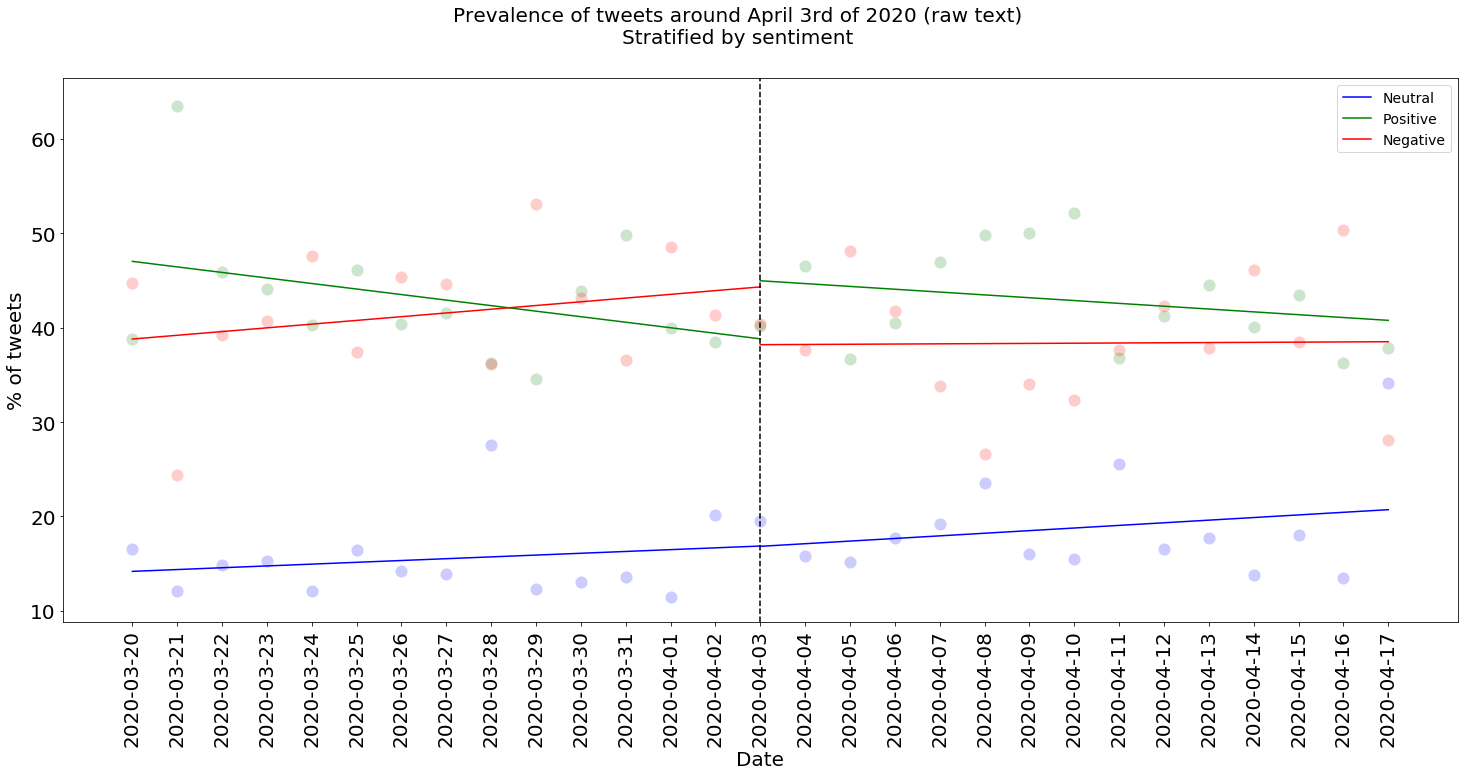

In [81]:
fig, ax = plt.subplots(figsize=(25,10))
    
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_neu_df,
             x = 'date',
             y = 'compound_text_neu_binary', color='blue', s=150, alpha=0.2)

sns.lineplot(ax = ax, 
            data = fitted_neu.head(15),
            x='date',
            y='compound_text_neu_binary', color='blue', label='Neutral')

sns.lineplot(ax = ax, 
            data = fitted_neu.tail(15),
            x='date',
            y='compound_text_neu_binary', color='blue')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_pos_df,
             x = 'date',
             y = 'compound_text_pos_binary', color='green', s=150, alpha=0.2)

sns.lineplot(ax = ax, 
            data = fitted_pos.head(15),
            x='date',
            y='compound_text_pos_binary', color='green', label='Positive')

sns.lineplot(ax = ax, 
            data = fitted_pos.tail(15),
            x='date',
            y='compound_text_pos_binary', color='green')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_neg_df,
             x = 'date',
             y = 'compound_text_neg_binary', color='red', s=150, alpha =0.2)

sns.lineplot(ax = ax, 
            data = fitted_neg.head(15),
            x='date',
            y='compound_text_neg_binary', color='red', label='Negative')

sns.lineplot(ax = ax, 
            data = fitted_neg.tail(15),
            x='date',
            y='compound_text_neg_binary', color='red')

fig.suptitle('Prevalence of tweets around April 3rd of 2020 (raw text)\nStratified by sentiment', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('% of tweets', fontsize=20)

# Add legend
plt.legend(fontsize=14)

plt.axvline(x='2020-04-03',color='black',linestyle='dashed')

plt.savefig('D:/TwitterData/sentiment_14d_raw.png')
plt.savefig('D:/TwitterData/sentiment_14d_raw.pdf')

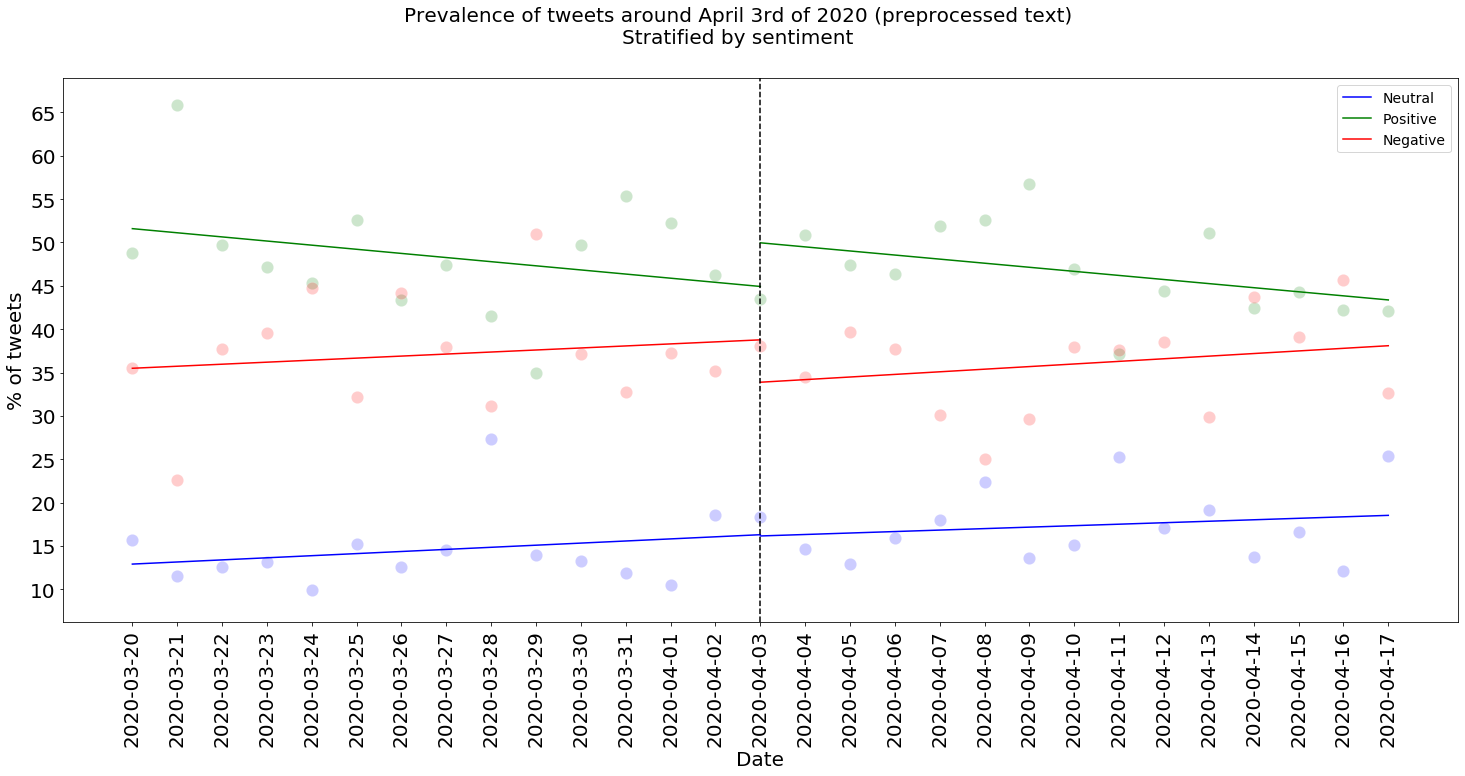

In [82]:
fig, ax = plt.subplots(figsize=(25,10))
plt.xticks(rotation=90,fontsize=20)
plt.yticks([10,15,20,25,30,35,40,45,50,55,60,65],fontsize=20)

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_tokens_neu_df,
             x = 'date',
             y = 'compound_text_tokens_neu_binary', color='blue', s=150, alpha=0.2)

sns.lineplot(ax = ax, 
            data = fitted_tokens_neu.head(15),
            x='date',
            y='compound_text_tokens_neu_binary', color='blue', label='Neutral')

sns.lineplot(ax = ax, 
            data = fitted_tokens_neu.tail(15),
            x='date',
            y='compound_text_tokens_neu_binary', color='blue')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_tokens_pos_df,
             x = 'date',
             y = 'compound_text_tokens_pos_binary', color='green', s=150, alpha=0.2)

sns.lineplot(ax = ax, 
            data = fitted_tokens_pos.head(15),
            x='date',
            y='compound_text_tokens_pos_binary', color='green', label='Positive')

sns.lineplot(ax = ax, 
            data = fitted_tokens_pos.tail(15),
            x='date',
            y='compound_text_tokens_pos_binary', color='green')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_tokens_neg_df,
             x = 'date',
             y = 'compound_text_tokens_neg_binary', color='red', s=150, alpha=0.2)


sns.lineplot(ax = ax, 
            data = fitted_tokens_neg.head(15),
            x='date',
            y='compound_text_tokens_neg_binary', color='red', label='Negative')

sns.lineplot(ax = ax, 
            data = fitted_tokens_neg.tail(15),
            x='date',
            y='compound_text_tokens_neg_binary', color='red')

fig.suptitle('Prevalence of tweets around April 3rd of 2020 (preprocessed text)\nStratified by sentiment', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('% of tweets', fontsize=20)

# Add legend
plt.legend(fontsize=14)

#plt.axvline(pd.Timestamp('2020-04-03'),color='black',linestyle='dashed')
plt.axvline(x='2020-04-03',color='black',linestyle='dashed')

plt.savefig('D:/TwitterData/sentiment_14d_preprocessed.png')
plt.savefig('D:/TwitterData/sentiment_14d_preprocessed.pdf')

In [83]:
january_june_tweets_subset_anger = january_june_tweets_subset.groupby('date')['anger_text_avg'].mean().reset_index()
january_june_tweets_subset_anticipation = january_june_tweets_subset.groupby('date')['anticipation_text_avg'].mean().reset_index()
january_june_tweets_subset_disgust = january_june_tweets_subset.groupby('date')['disgust_text_avg'].mean().reset_index()
january_june_tweets_subset_fear = january_june_tweets_subset.groupby('date')['fear_text_avg'].mean().reset_index()
january_june_tweets_subset_joy = january_june_tweets_subset.groupby('date')['joy_text_avg'].mean().reset_index()
january_june_tweets_subset_sadness = january_june_tweets_subset.groupby('date')['sadness_text_avg'].mean().reset_index()
january_june_tweets_subset_surprise = january_june_tweets_subset.groupby('date')['surprise_text_avg'].mean().reset_index()
january_june_tweets_subset_trust = january_june_tweets_subset.groupby('date')['trust_text_avg'].mean().reset_index()

In [84]:
january_june_tweets_subset_tokens_anger = january_june_tweets_subset.groupby('date')['anger_text_tokens_avg'].mean().reset_index()
january_june_tweets_subset_tokens_anticipation = january_june_tweets_subset.groupby('date')['anticipation_text_tokens_avg'].mean().reset_index()
january_june_tweets_subset_tokens_disgust = january_june_tweets_subset.groupby('date')['disgust_text_tokens_avg'].mean().reset_index()
january_june_tweets_subset_tokens_fear = january_june_tweets_subset.groupby('date')['fear_text_tokens_avg'].mean().reset_index()
january_june_tweets_subset_tokens_joy = january_june_tweets_subset.groupby('date')['joy_text_tokens_avg'].mean().reset_index()
january_june_tweets_subset_tokens_sadness = january_june_tweets_subset.groupby('date')['sadness_text_tokens_avg'].mean().reset_index()
january_june_tweets_subset_tokens_surprise = january_june_tweets_subset.groupby('date')['surprise_text_tokens_avg'].mean().reset_index()
january_june_tweets_subset_tokens_trust = january_june_tweets_subset.groupby('date')['trust_text_tokens_avg'].mean().reset_index()

In [85]:
january_june_tweets_subset_anger_df = pd.DataFrame(january_june_tweets_subset_anger)
january_june_tweets_subset_anger_df.columns = ['date','anger_text_avg']

january_june_tweets_subset_anticipation_df = pd.DataFrame(january_june_tweets_subset_anticipation)
january_june_tweets_subset_anticipation_df.columns = ['date','anticipation_text_avg']

january_june_tweets_subset_disgust_df = pd.DataFrame(january_june_tweets_subset_disgust)
january_june_tweets_subset_disgust_df.columns = ['date','disgust_text_avg']

january_june_tweets_subset_fear_df = pd.DataFrame(january_june_tweets_subset_fear)
january_june_tweets_subset_fear_df.columns = ['date','fear_text_avg']

january_june_tweets_subset_joy_df = pd.DataFrame(january_june_tweets_subset_joy)
january_june_tweets_subset_joy_df.columns = ['date','joy_text_avg']

january_june_tweets_subset_sadness_df = pd.DataFrame(january_june_tweets_subset_sadness)
january_june_tweets_subset_sadness_df.columns = ['date','sadness_text_avg']

january_june_tweets_subset_surprise_df = pd.DataFrame(january_june_tweets_subset_surprise)
january_june_tweets_subset_surprise_df.columns = ['date','surprise_text_avg']

january_june_tweets_subset_trust_df = pd.DataFrame(january_june_tweets_subset_trust)
january_june_tweets_subset_trust_df.columns = ['date','trust_text_avg']

In [86]:
january_june_tweets_subset_tokens_anger_df = pd.DataFrame(january_june_tweets_subset_tokens_anger)
january_june_tweets_subset_tokens_anger_df.columns = ['date','anger_text_tokens_avg']

january_june_tweets_subset_tokens_anticipation_df = pd.DataFrame(january_june_tweets_subset_tokens_anticipation)
january_june_tweets_subset_tokens_anticipation_df.columns = ['date','anticipation_text_tokens_avg']

january_june_tweets_subset_tokens_disgust_df = pd.DataFrame(january_june_tweets_subset_tokens_disgust)
january_june_tweets_subset_tokens_disgust_df.columns = ['date','disgust_text_tokens_avg']

january_june_tweets_subset_tokens_fear_df = pd.DataFrame(january_june_tweets_subset_tokens_fear)
january_june_tweets_subset_tokens_fear_df.columns = ['date','fear_text_tokens_avg']

january_june_tweets_subset_tokens_joy_df = pd.DataFrame(january_june_tweets_subset_tokens_joy)
january_june_tweets_subset_tokens_joy_df.columns = ['date','joy_text_tokens_avg']

january_june_tweets_subset_tokens_sadness_df = pd.DataFrame(january_june_tweets_subset_tokens_sadness)
january_june_tweets_subset_tokens_sadness_df.columns = ['date','sadness_text_tokens_avg']

january_june_tweets_subset_tokens_surprise_df = pd.DataFrame(january_june_tweets_subset_tokens_surprise)
january_june_tweets_subset_tokens_surprise_df.columns = ['date','surprise_text_tokens_avg']

january_june_tweets_subset_tokens_trust_df = pd.DataFrame(january_june_tweets_subset_tokens_trust)
january_june_tweets_subset_tokens_trust_df.columns = ['date','trust_text_tokens_avg']

# to be continued

In [87]:
ydata_anger_pre = january_june_tweets_subset_anger_df[january_june_tweets_subset_anger_df['date'].isin(date_pre)]['anger_text_avg']
ydata_anger_post = january_june_tweets_subset_anger_df[january_june_tweets_subset_anger_df['date'].isin(date_post)]['anger_text_avg']

ydata_anticipation_pre = january_june_tweets_subset_anticipation_df[january_june_tweets_subset_anticipation_df['date'].isin(date_pre)]['anticipation_text_avg']
ydata_anticipation_post = january_june_tweets_subset_anticipation_df[january_june_tweets_subset_anticipation_df['date'].isin(date_post)]['anticipation_text_avg']

ydata_disgust_pre = january_june_tweets_subset_disgust_df[january_june_tweets_subset_disgust_df['date'].isin(date_pre)]['disgust_text_avg']
ydata_disgust_post =january_june_tweets_subset_disgust_df[january_june_tweets_subset_disgust_df['date'].isin(date_post)]['disgust_text_avg']

ydata_fear_pre = january_june_tweets_subset_fear_df[january_june_tweets_subset_fear_df['date'].isin(date_pre)]['fear_text_avg']
ydata_fear_post = january_june_tweets_subset_fear_df[january_june_tweets_subset_fear_df['date'].isin(date_post)]['fear_text_avg']

ydata_joy_pre = january_june_tweets_subset_joy_df[january_june_tweets_subset_joy_df['date'].isin(date_pre)]['joy_text_avg']
ydata_joy_post = january_june_tweets_subset_joy_df[january_june_tweets_subset_joy_df['date'].isin(date_post)]['joy_text_avg']

ydata_sadness_pre = january_june_tweets_subset_sadness_df[january_june_tweets_subset_sadness_df['date'].isin(date_pre)]['sadness_text_avg']
ydata_sadness_post =january_june_tweets_subset_sadness_df[january_june_tweets_subset_sadness_df['date'].isin(date_post)]['sadness_text_avg']

ydata_surprise_pre = january_june_tweets_subset_surprise_df[january_june_tweets_subset_surprise_df['date'].isin(date_pre)]['surprise_text_avg']
ydata_surprise_post =january_june_tweets_subset_surprise_df[january_june_tweets_subset_surprise_df['date'].isin(date_post)]['surprise_text_avg']

ydata_trust_pre = january_june_tweets_subset_trust_df[january_june_tweets_subset_trust_df['date'].isin(date_pre)]['trust_text_avg']
ydata_trust_post =january_june_tweets_subset_trust_df[january_june_tweets_subset_trust_df['date'].isin(date_post)]['trust_text_avg']

In [88]:
popt_anger_pre, pcov_anger_pre = curve_fit(linear_func, xdata, ydata_anger_pre, method='lm')
popt_anger_post, pcov_anger_post = curve_fit(linear_func, xdata, ydata_anger_post, method='lm')

popt_anticipation_pre, pcov_anticipation_pre = curve_fit(linear_func, xdata, ydata_anticipation_pre, method='lm')
popt_anticipation_post, pcov_anticipation_post = curve_fit(linear_func, xdata, ydata_anticipation_post, method='lm')

popt_disgust_pre, pcov_disgust_pre = curve_fit(linear_func, xdata, ydata_disgust_pre, method='lm')
popt_disgust_post, pcov_disgust_post = curve_fit(linear_func, xdata, ydata_disgust_post, method='lm')

popt_fear_pre, pcov_fear_pre = curve_fit(linear_func, xdata, ydata_fear_pre, method='lm')
popt_fear_post, pcov_fear_post = curve_fit(linear_func, xdata, ydata_fear_post, method='lm')

popt_joy_pre, pcov_joy_pre = curve_fit(linear_func, xdata, ydata_joy_pre, method='lm')
popt_joy_post, pcov_joy_post = curve_fit(linear_func, xdata, ydata_joy_post, method='lm')

popt_sadness_pre, pcov_sadness_pre = curve_fit(linear_func, xdata, ydata_sadness_pre, method='lm')
popt_sadness_post, pcov_sadness_post = curve_fit(linear_func, xdata, ydata_sadness_post, method='lm')

popt_surprise_pre, pcov_surprise_pre = curve_fit(linear_func, xdata, ydata_surprise_pre, method='lm')
popt_surprise_post, pcov_surprise_post = curve_fit(linear_func, xdata, ydata_surprise_post, method='lm')

popt_trust_pre, pcov_trust_pre = curve_fit(linear_func, xdata, ydata_trust_pre, method='lm')
popt_trust_post, pcov_trust_post = curve_fit(linear_func, xdata, ydata_trust_post, method='lm')

In [89]:
ydata_anger_tokens_pre = january_june_tweets_subset_tokens_anger_df[january_june_tweets_subset_tokens_anger['date'].isin(date_pre)]['anger_text_tokens_avg']
ydata_anger_tokens_post = january_june_tweets_subset_tokens_anger_df[january_june_tweets_subset_tokens_anger['date'].isin(date_post)]['anger_text_tokens_avg']

ydata_anticipation_tokens_pre = january_june_tweets_subset_tokens_anticipation_df[january_june_tweets_subset_tokens_anticipation['date'].isin(date_pre)]['anticipation_text_tokens_avg']
ydata_anticipation_tokens_post = january_june_tweets_subset_tokens_anticipation_df[january_june_tweets_subset_tokens_anticipation['date'].isin(date_post)]['anticipation_text_tokens_avg']

ydata_disgust_tokens_pre = january_june_tweets_subset_tokens_disgust_df[january_june_tweets_subset_tokens_disgust['date'].isin(date_pre)]['disgust_text_tokens_avg']
ydata_disgust_tokens_post =january_june_tweets_subset_tokens_disgust_df[january_june_tweets_subset_tokens_disgust['date'].isin(date_post)]['disgust_text_tokens_avg']

ydata_joy_tokens_pre = january_june_tweets_subset_tokens_joy_df[january_june_tweets_subset_tokens_joy['date'].isin(date_pre)]['joy_text_tokens_avg']
ydata_joy_tokens_post =january_june_tweets_subset_tokens_joy_df[january_june_tweets_subset_tokens_joy['date'].isin(date_post)]['joy_text_tokens_avg']

ydata_fear_tokens_pre = january_june_tweets_subset_tokens_fear_df[january_june_tweets_subset_tokens_fear['date'].isin(date_pre)]['fear_text_tokens_avg']
ydata_fear_tokens_post =january_june_tweets_subset_tokens_fear_df[january_june_tweets_subset_tokens_fear['date'].isin(date_post)]['fear_text_tokens_avg']

ydata_surprise_tokens_pre = january_june_tweets_subset_tokens_surprise_df[january_june_tweets_subset_tokens_surprise['date'].isin(date_pre)]['surprise_text_tokens_avg']
ydata_surprise_tokens_post =january_june_tweets_subset_tokens_surprise_df[january_june_tweets_subset_tokens_surprise['date'].isin(date_post)]['surprise_text_tokens_avg']

ydata_sadness_tokens_pre = january_june_tweets_subset_tokens_sadness_df[january_june_tweets_subset_tokens_sadness['date'].isin(date_pre)]['sadness_text_tokens_avg']
ydata_sadness_tokens_post =january_june_tweets_subset_tokens_sadness_df[january_june_tweets_subset_tokens_sadness['date'].isin(date_post)]['sadness_text_tokens_avg']

ydata_trust_tokens_pre = january_june_tweets_subset_tokens_trust_df[january_june_tweets_subset_tokens_trust['date'].isin(date_pre)]['trust_text_tokens_avg']
ydata_trust_tokens_post =january_june_tweets_subset_tokens_trust_df[january_june_tweets_subset_tokens_trust['date'].isin(date_post)]['trust_text_tokens_avg']

In [90]:
popt_anger_tokens_pre, pcov_anger_tokens_pre = curve_fit(linear_func, xdata, ydata_anger_tokens_pre, method='lm')
popt_anger_tokens_post, pcov_anger_tokens_post = curve_fit(linear_func, xdata, ydata_anger_tokens_post, method='lm')

popt_anticipation_tokens_pre, pcov_anticipation_tokens_pre = curve_fit(linear_func, xdata, ydata_anticipation_tokens_pre, method='lm')
popt_anticipation_tokens_post, pcov_anticipation_tokens_post = curve_fit(linear_func, xdata, ydata_anticipation_tokens_post, method='lm')

popt_disgust_tokens_pre, pcov_disgust_tokens_pre = curve_fit(linear_func, xdata, ydata_disgust_tokens_pre, method='lm')
popt_disgust_tokens_post, pcov_disgust_tokens_post = curve_fit(linear_func, xdata, ydata_disgust_tokens_post, method='lm')

popt_fear_tokens_pre, pcov_fear_tokens_pre = curve_fit(linear_func, xdata, ydata_fear_tokens_pre, method='lm')
popt_fear_tokens_post, pcov_fear_tokens_post = curve_fit(linear_func, xdata, ydata_fear_tokens_post, method='lm')

popt_joy_tokens_pre, pcov_joy_tokens_pre = curve_fit(linear_func, xdata, ydata_joy_tokens_pre, method='lm')
popt_joy_tokens_post, pcov_joy_tokens_post = curve_fit(linear_func, xdata, ydata_joy_tokens_post, method='lm')

popt_surprise_tokens_pre, pcov_surprise_tokens_pre = curve_fit(linear_func, xdata, ydata_surprise_tokens_pre, method='lm')
popt_surprise_tokens_post, pcov_surprise_tokens_post = curve_fit(linear_func, xdata, ydata_surprise_tokens_post, method='lm')

popt_sadness_tokens_pre, pcov_sadness_tokens_pre = curve_fit(linear_func, xdata, ydata_sadness_tokens_pre, method='lm')
popt_sadness_tokens_post, pcov_sadness_tokens_post = curve_fit(linear_func, xdata, ydata_sadness_tokens_post, method='lm')

popt_trust_tokens_pre, pcov_trust_tokens_pre = curve_fit(linear_func, xdata, ydata_trust_tokens_pre, method='lm')
popt_trust_tokens_post, pcov_trust_tokens_post = curve_fit(linear_func, xdata, ydata_trust_tokens_post, method='lm')

In [91]:
import numpy as np

fitted_anger_pre = pd.DataFrame(
    {'date': date_pre,
     'anger_text_avg': linear_func(np.asarray(xdata),*popt_anger_pre)
    })

fitted_anger_post = pd.DataFrame(
    {'date': date_post,
     'anger_text_avg': linear_func(np.asarray(xdata),*popt_anger_post)
    })

fitted_anticipation_pre = pd.DataFrame(
    {'date': date_pre,
     'anticipation_text_avg': linear_func(np.asarray(xdata),*popt_anticipation_pre)
    })

fitted_anticipation_post = pd.DataFrame(
    {'date': date_post,
     'anticipation_text_avg': linear_func(np.asarray(xdata),*popt_anticipation_post)
    })

fitted_disgust_pre = pd.DataFrame(
    {'date': date_pre,
     'disgust_text_avg': linear_func(np.asarray(xdata),*popt_disgust_pre)
    })

fitted_disgust_post = pd.DataFrame(
    {'date': date_post,
     'disgust_text_avg': linear_func(np.asarray(xdata),*popt_disgust_post)
    })

fitted_fear_pre = pd.DataFrame(
    {'date': date_pre,
     'fear_text_avg': linear_func(np.asarray(xdata),*popt_fear_pre)
    })

fitted_fear_post = pd.DataFrame(
    {'date': date_post,
     'fear_text_avg': linear_func(np.asarray(xdata),*popt_fear_post)
    })

fitted_joy_pre = pd.DataFrame(
    {'date': date_pre,
     'joy_text_avg': linear_func(np.asarray(xdata),*popt_joy_pre)
    })

fitted_joy_post = pd.DataFrame(
    {'date': date_post,
     'joy_text_avg': linear_func(np.asarray(xdata),*popt_joy_post)
    })

fitted_sadness_pre = pd.DataFrame(
    {'date': date_pre,
     'sadness_text_avg': linear_func(np.asarray(xdata),*popt_sadness_pre)
    })

fitted_sadness_post = pd.DataFrame(
    {'date': date_post,
     'sadness_text_avg': linear_func(np.asarray(xdata),*popt_sadness_post)
    })

fitted_surprise_pre = pd.DataFrame(
    {'date': date_pre,
     'surprise_text_avg': linear_func(np.asarray(xdata),*popt_surprise_pre)
    })

fitted_surprise_post = pd.DataFrame(
    {'date': date_post,
     'surprise_text_avg': linear_func(np.asarray(xdata),*popt_surprise_post)
    })

fitted_trust_pre = pd.DataFrame(
    {'date': date_pre,
     'trust_text_avg': linear_func(np.asarray(xdata),*popt_trust_pre)
    })

fitted_trust_post = pd.DataFrame(
    {'date': date_post,
     'trust_text_avg': linear_func(np.asarray(xdata),*popt_trust_post)
    })

In [92]:
fitted_anger_tokens_pre = pd.DataFrame(
    {'date': date_pre,
     'anger_text_tokens_avg': linear_func(np.asarray(xdata),*popt_anger_tokens_pre)
    })

fitted_anger_tokens_post = pd.DataFrame(
    {'date': date_post,
     'anger_text_tokens_avg': linear_func(np.asarray(xdata),*popt_anger_tokens_post)
    })

fitted_anticipation_tokens_pre = pd.DataFrame(
    {'date': date_pre,
     'anticipation_text_tokens_avg': linear_func(np.asarray(xdata),*popt_anticipation_tokens_pre)
    })

fitted_anticipation_tokens_post = pd.DataFrame(
    {'date': date_post,
     'anticipation_text_tokens_avg': linear_func(np.asarray(xdata),*popt_anticipation_tokens_post)
    })

fitted_disgust_tokens_pre = pd.DataFrame(
    {'date': date_pre,
     'disgust_text_tokens_avg': linear_func(np.asarray(xdata),*popt_disgust_tokens_pre)
    })

fitted_disgust_tokens_post = pd.DataFrame(
    {'date': date_post,
     'disgust_text_tokens_avg': linear_func(np.asarray(xdata),*popt_disgust_tokens_post)
    })

fitted_fear_tokens_pre = pd.DataFrame(
    {'date': date_pre,
     'fear_text_tokens_avg': linear_func(np.asarray(xdata),*popt_fear_tokens_pre)
    })

fitted_fear_tokens_post = pd.DataFrame(
    {'date': date_post,
     'fear_text_tokens_avg': linear_func(np.asarray(xdata),*popt_fear_tokens_post)
    })

fitted_joy_tokens_pre = pd.DataFrame(
    {'date': date_pre,
     'joy_text_tokens_avg': linear_func(np.asarray(xdata),*popt_joy_tokens_pre)
    })

fitted_joy_tokens_post = pd.DataFrame(
    {'date': date_post,
     'joy_text_tokens_avg': linear_func(np.asarray(xdata),*popt_joy_tokens_post)
    })

fitted_sadness_tokens_pre = pd.DataFrame(
    {'date': date_pre,
     'sadness_text_tokens_avg': linear_func(np.asarray(xdata),*popt_sadness_tokens_pre)
    })

fitted_sadness_tokens_post = pd.DataFrame(
    {'date': date_post,
     'sadness_text_tokens_avg': linear_func(np.asarray(xdata),*popt_sadness_tokens_post)
    })

fitted_surprise_tokens_pre = pd.DataFrame(
    {'date': date_pre,
     'surprise_text_tokens_avg': linear_func(np.asarray(xdata),*popt_surprise_tokens_pre)
    })

fitted_surprise_tokens_post = pd.DataFrame(
    {'date': date_post,
     'surprise_text_tokens_avg': linear_func(np.asarray(xdata),*popt_surprise_tokens_post)
    })

fitted_trust_tokens_pre = pd.DataFrame(
    {'date': date_pre,
     'trust_text_tokens_avg': linear_func(np.asarray(xdata),*popt_trust_tokens_pre)
    })

fitted_trust_tokens_post = pd.DataFrame(
    {'date': date_post,
     'trust_text_tokens_avg': linear_func(np.asarray(xdata),*popt_trust_tokens_post)
    })

In [93]:
fitted_anger = pd.concat([fitted_anger_pre,fitted_anger_post])
fitted_anticipation = pd.concat([fitted_anticipation_pre,fitted_anticipation_post])
fitted_disgust = pd.concat([fitted_disgust_pre,fitted_disgust_post])
fitted_joy = pd.concat([fitted_joy_pre,fitted_joy_post])
fitted_fear = pd.concat([fitted_fear_pre,fitted_fear_post])
fitted_sadness = pd.concat([fitted_sadness_pre,fitted_sadness_post])
fitted_surprise = pd.concat([fitted_surprise_pre,fitted_surprise_post])
fitted_trust = pd.concat([fitted_trust_pre,fitted_trust_post])

In [94]:
fitted_tokens_anger = pd.concat([fitted_anger_tokens_pre,fitted_anger_tokens_post])
fitted_tokens_anticipation = pd.concat([fitted_anticipation_tokens_pre,fitted_anticipation_tokens_post])
fitted_tokens_disgust = pd.concat([fitted_disgust_tokens_pre,fitted_disgust_tokens_post])
fitted_tokens_joy = pd.concat([fitted_joy_tokens_pre,fitted_joy_tokens_post])
fitted_tokens_fear = pd.concat([fitted_fear_tokens_pre,fitted_fear_tokens_post])
fitted_tokens_sadness = pd.concat([fitted_sadness_tokens_pre,fitted_sadness_tokens_post])
fitted_tokens_surprise = pd.concat([fitted_surprise_tokens_pre,fitted_surprise_tokens_post])
fitted_tokens_trust = pd.concat([fitted_trust_tokens_pre,fitted_trust_tokens_post])

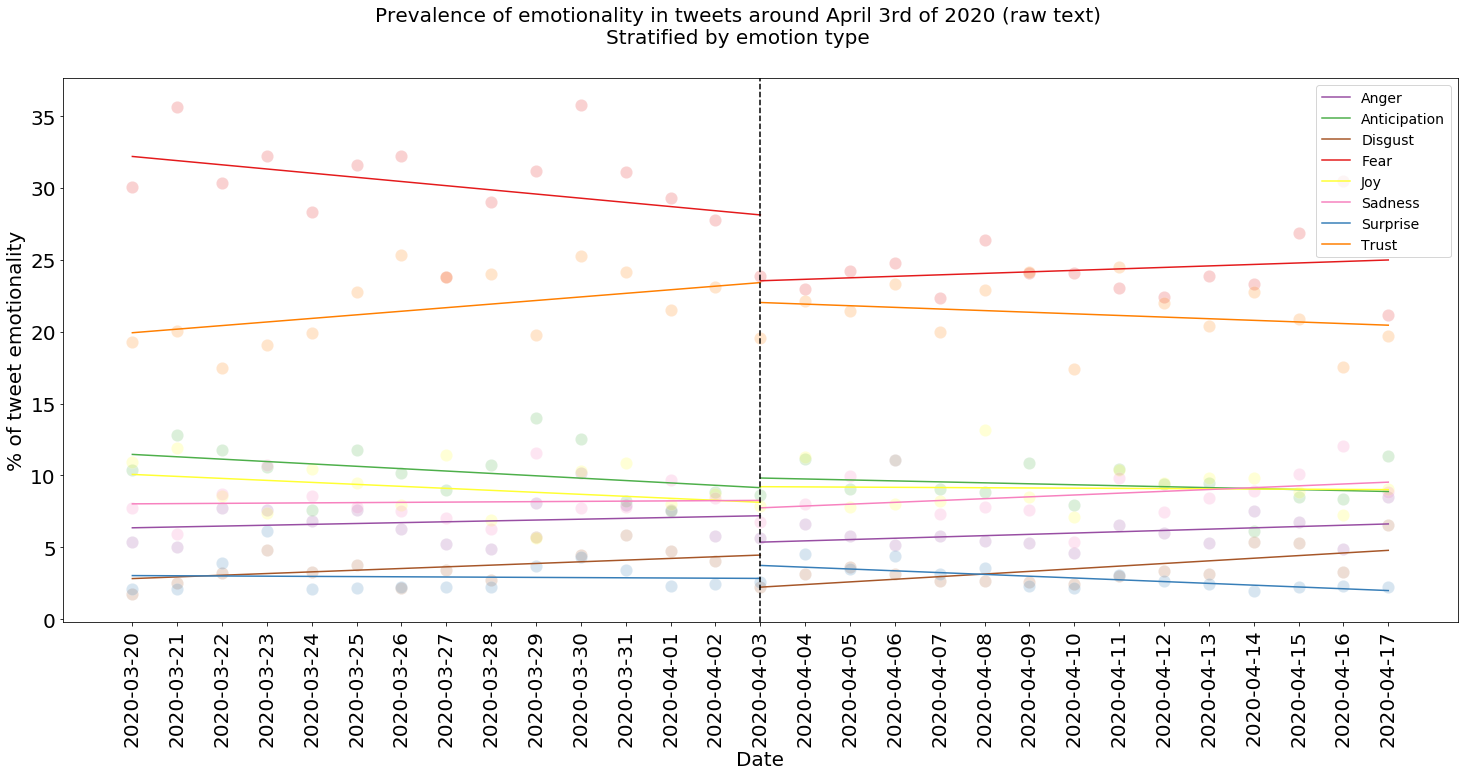

In [95]:
fig, ax = plt.subplots(figsize=(25,10))
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_anger_df,
             x = 'date',
             y = 'anger_text_avg', color='#984ea3', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_anger.head(15),
             x = 'date',
             y = 'anger_text_avg', color='#984ea3', label='Anger')

sns.lineplot(ax = ax,
             data = fitted_anger.tail(15),
             x = 'date',
             y = 'anger_text_avg', color='#984ea3')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_anticipation_df,
             x = 'date',
             y = 'anticipation_text_avg', color='#4daf4a', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_anticipation.head(15),
             x = 'date',
             y = 'anticipation_text_avg', color='#4daf4a', label='Anticipation')

sns.lineplot(ax = ax,
             data = fitted_anticipation.tail(15),
             x = 'date',
             y = 'anticipation_text_avg', color='#4daf4a')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_disgust_df,
             x = 'date',
             y = 'disgust_text_avg', color='#a65628', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_disgust.head(15),
             x = 'date',
             y = 'disgust_text_avg', color='#a65628', label='Disgust')

sns.lineplot(ax = ax,
             data = fitted_disgust.tail(15),
             x = 'date',
             y = 'disgust_text_avg', color='#a65628')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_fear_df,
             x = 'date',
             y = 'fear_text_avg', color='#e41a1c', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_fear.head(15),
             x = 'date',
             y = 'fear_text_avg', color='#e41a1c', label='Fear')

sns.lineplot(ax = ax,
             data = fitted_fear.tail(15),
             x = 'date',
             y = 'fear_text_avg', color='#e41a1c')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_joy_df,
             x = 'date',
             y = 'joy_text_avg', color='#ffff33', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_joy.head(15),
             x = 'date',
             y = 'joy_text_avg', color='#ffff33', label='Joy')

sns.lineplot(ax = ax,
             data = fitted_joy.tail(15),
             x = 'date',
             y = 'joy_text_avg', color='#ffff33')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_sadness_df,
             x = 'date',
             y = 'sadness_text_avg', color='#f781bf', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_sadness.head(15),
             x = 'date',
             y = 'sadness_text_avg', color='#f781bf', label='Sadness')

sns.lineplot(ax = ax,
             data = fitted_sadness.tail(15),
             x = 'date',
             y = 'sadness_text_avg', color='#f781bf')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_surprise_df,
             x = 'date',
             y = 'surprise_text_avg', color='#377eb8', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_surprise.head(15),
             x = 'date',
             y = 'surprise_text_avg', color='#377eb8', label='Surprise')

sns.lineplot(ax = ax,
             data = fitted_surprise.tail(15),
             x = 'date',
             y = 'surprise_text_avg', color='#377eb8')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_trust_df,
             x = 'date',
             y = 'trust_text_avg', color='#ff7f00', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_trust.head(15),
             x = 'date',
             y = 'trust_text_avg', color='#ff7f00', label='Trust')

sns.lineplot(ax = ax,
             data = fitted_trust.tail(15),
             x = 'date',
             y = 'trust_text_avg', color='#ff7f00')

fig.suptitle('Prevalence of emotionality in tweets around April 3rd of 2020 (raw text)\nStratified by emotion type', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('% of tweet emotionality', fontsize=20)

# Add legend
plt.legend(fontsize=14)

plt.axvline('2020-04-03',color='black', linestyle='dashed')

plt.savefig('D:/TwitterData/emotion_14d_raw.png')
plt.savefig('D:/TwitterData/emotion_14d_raw.pdf')

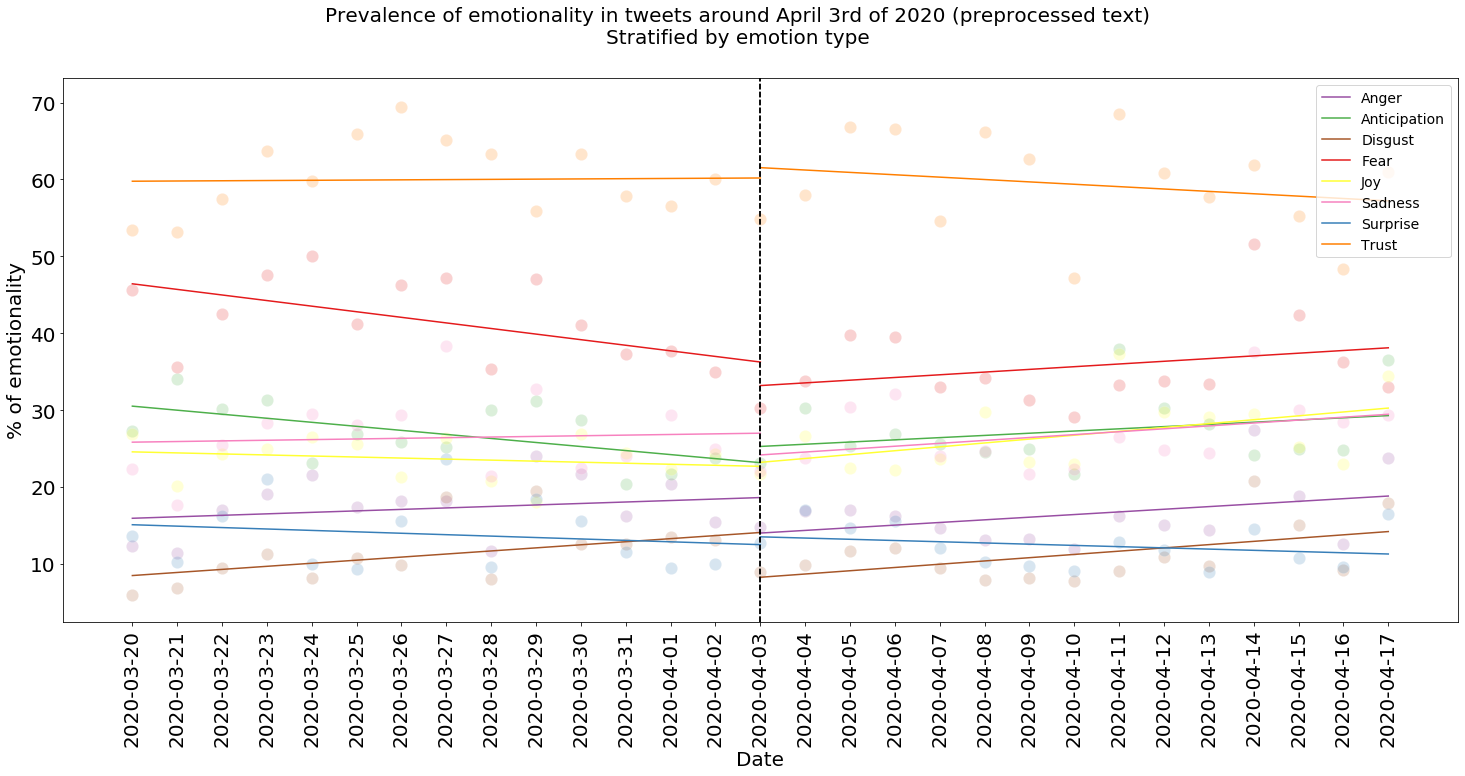

In [96]:
fig, ax = plt.subplots(figsize=(25,10))
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_tokens_anger_df,
             x = 'date',
             y = 'anger_text_tokens_avg', color='#984ea3', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_tokens_anger.head(15),
             x = 'date',
             y = 'anger_text_tokens_avg', color='#984ea3', label='Anger')

sns.lineplot(ax = ax,
             data = fitted_tokens_anger.tail(15),
             x = 'date',
             y = 'anger_text_tokens_avg', color='#984ea3')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_tokens_anticipation_df,
             x = 'date',
             y = 'anticipation_text_tokens_avg', color='#4daf4a', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_tokens_anticipation.head(15),
             x = 'date',
             y = 'anticipation_text_tokens_avg', color='#4daf4a', label='Anticipation')

sns.lineplot(ax = ax,
             data = fitted_tokens_anticipation.tail(15),
             x = 'date',
             y = 'anticipation_text_tokens_avg', color='#4daf4a')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_tokens_disgust_df,
             x = 'date',
             y = 'disgust_text_tokens_avg', color='#a65628', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_tokens_disgust.head(15),
             x = 'date',
             y = 'disgust_text_tokens_avg', color='#a65628', label='Disgust')

sns.lineplot(ax = ax,
             data = fitted_tokens_disgust.tail(15),
             x = 'date',
             y = 'disgust_text_tokens_avg', color='#a65628')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_tokens_fear_df,
             x = 'date',
             y = 'fear_text_tokens_avg', color='#e41a1c', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_tokens_fear.head(15),
             x = 'date',
             y = 'fear_text_tokens_avg', color='#e41a1c', label='Fear')

sns.lineplot(ax = ax,
             data = fitted_tokens_fear.tail(15),
             x = 'date',
             y = 'fear_text_tokens_avg', color='#e41a1c')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_tokens_joy_df,
             x = 'date',
             y = 'joy_text_tokens_avg', color='#ffff33', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_tokens_joy.head(15),
             x = 'date',
             y = 'joy_text_tokens_avg', color='#ffff33', label='Joy')

sns.lineplot(ax = ax,
             data = fitted_tokens_joy.tail(15),
             x = 'date',
             y = 'joy_text_tokens_avg', color='#ffff33')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_tokens_sadness_df,
             x = 'date',
             y = 'sadness_text_tokens_avg', color='#f781bf', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_tokens_sadness.head(15),
             x = 'date',
             y = 'sadness_text_tokens_avg', color='#f781bf', label='Sadness')

sns.lineplot(ax = ax,
             data = fitted_tokens_sadness.tail(15),
             x = 'date',
             y = 'sadness_text_tokens_avg', color='#f781bf')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_tokens_surprise_df,
             x = 'date',
             y = 'surprise_text_tokens_avg', color='#377eb8', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_tokens_surprise.head(15),
             x = 'date',
             y = 'surprise_text_tokens_avg', color='#377eb8', label='Surprise')

sns.lineplot(ax = ax,
             data = fitted_tokens_surprise.tail(15),
             x = 'date',
             y = 'surprise_text_tokens_avg', color='#377eb8')

sns.scatterplot(ax = ax,
             data = january_june_tweets_subset_tokens_trust_df,
             x = 'date',
             y = 'trust_text_tokens_avg', color='#ff7f00', s=150, alpha=0.2)

sns.lineplot(ax = ax,
             data = fitted_tokens_trust.head(15),
             x = 'date',
             y = 'trust_text_tokens_avg', color='#ff7f00', label='Trust')

sns.lineplot(ax = ax,
             data = fitted_tokens_trust.tail(15),
             x = 'date',
             y = 'trust_text_tokens_avg', color='#ff7f00')

fig.suptitle('Prevalence of emotionality in tweets around April 3rd of 2020 (raw text)\nStratified by emotion type', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('% of tweet emotionality', fontsize=20)

# Add legend
plt.legend(fontsize=14)

plt.axvline('2020-04-03',color='black', linestyle='dashed')

fig.suptitle('Prevalence of emotionality in tweets around April 3rd of 2020 (preprocessed text)\nStratified by emotion type',
             fontsize=20)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('% of emotionality', fontsize=20)

# Add legend
plt.legend(fontsize=14)

plt.axvline('2020-04-03',color='black', linestyle='dashed')

plt.savefig('D:/TwitterData/emotion_14d_preprocessed.png')
plt.savefig('D:/TwitterData/emotion_14d_preprocessed.pdf')